# Ejercicio con regularizadores

In [135]:
%tensorflow_version 2.x
import tensorflow as tf
from tensorflow import keras
print(tf.keras.__version__)
print("GPU Available:", tf.config.list_physical_devices('GPU'))
print(tf.__version__)
from keras.datasets import mnist
from keras import models
from keras import layers
import numpy as np
import matplotlib.pyplot as plt
from keras import regularizers

Colab only includes TensorFlow 2.x; %tensorflow_version has no effect.
2.9.0
GPU Available: []
2.9.2


In [136]:
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

In [137]:
# Prepara con reshape y normaliza las imágenes tanto de entrenamiento como de test
train_images = train_images.reshape((60000, 28*28))
train_images = train_images.astype('float32') / 255

test_images = test_images.reshape((10000, 28*28))
test_images = test_images.astype('float32') / 255

In [138]:
# Crear un subconjunto de imágenes de entrenamiento que llamaré
# validation_images, para hacer las validaciones, con las 10000 últimas imágenes 
# del set de datos de entrenamiento (train_images) (obviamente, lo mismo con las
# etiquetas correspondientes -> validation_labels). Deja preparadas las 50K 
# primeras imágenes y etiquetas para entrenamiento (train_images y train_labels)
validation_images=train_images[50000:]
train_images=train_images[0:49999]
validation_labels=train_labels[50000:]
train_labels=train_labels[0:49999]

In [139]:
def crea_modelo(regularizador):
  # Define una función que recibe un número del 0 al 4 que creará:
  # un modelo secuencial con una capa de entrada densa de 512 neuronas
  # con activación relu y la capa de salida que le corresponda según el problema
  # Ahora, en función del número del regularizador:
  # Si es 0, no mete ningún regularizador
  # Si es 1, mete un regularizador de tipo l1 y valor 0.001
  # Si es 2, mete un regularizador de tipo l2 y valor 0.001
  # Si es 3, mete un regularizador de tipo l1_l2 y valor 0.001 para ambos
  # Si es 4, mete un Dropout del 50% después de la primera capa densa
  # Si es distinto que estos valores, escribe el error y retorna
  # Al final, esta función pinta el summary del modelo y retorna el modelo creado
  model= models.Sequential()
  if regularizador == 0:
    model.add(layers.Dense(512, activation='relu',input_shape=(28*28,)))
  elif regularizador == 1:
    model.add(layers.Dense(512, kernel_regularizer=regularizers.l1(0.001),activation='relu',input_shape=(28*28,)))
  elif regularizador == 2:
    model.add(layers.Dense(512, kernel_regularizer=regularizers.l2(0.001),activation='relu',input_shape=(28*28,)))
  elif regularizador == 3:
    model.add(layers.Dense(512, kernel_regularizer=regularizers.l1_l2(l1=0.001,l2=0.001),activation='relu',input_shape=(28*28,)))
  elif regularizador == 4:
    model.add(layers.Dense(512,activation='relu',input_shape=(28*28,)))
    model.add(layers.Dropout(0.5))
  model.add(layers.Dense(10,activation='softmax'))
  model.summary()
  return model

In [140]:
def compila_modelo(modelo): 
  # Define una función que recibe un modelo, lo compila con un optimizador
  # 'rmsprop', con una función de pérdida 'sparse_categorical_crossentropy' y
  # una métrica de precisión. La función retorna el modelo
  modelo.compile(optimizer='rmsprop', 
                loss='sparse_categorical_crossentropy',
                metrics=['accuracy'])
  return modelo

In [141]:
def entrena_modelo(modelo):
  # Define una función que entrena el modelo que se le pasa por parámetro,
  # con las imágenes y etiquetas de entrenamiento, con 30 iteraciones y 128
  # de tamaño de minilote y con el validation_data creado más arriba.
  # Esta función devuelve un history
  historia=modelo.fit(train_images, train_labels, epochs=30, batch_size=128,validation_data=(validation_images,validation_labels))
  return historia 

In [142]:
def pinta_perdida_entrenamiento_validacion(historia):
  history_dict = historia.history
  acc = historia.history['accuracy']
  val_acc = historia.history['val_accuracy']
  loss = historia.history['loss']
  val_loss = historia.history['val_loss']
  epochs = range(1, len(acc) + 1)
  # "bo" es para "punto azun"
  plt.plot(epochs, loss, 'bo', label='Pérdida de Entrenamiento')
  # "b" es para "linea continua azul"
  plt.plot(epochs, val_loss, 'b', label='Pérdida de Validación')
  plt.title('Pérdida de Entrenamiento y Validación')
  plt.xlabel('Epochs')
  plt.ylabel('Loss')
  plt.legend()
  plt.show()

In [143]:
def pinta_precision_entrenamiento_validacion(historia):
  history_dict = historia.history
  acc = historia.history['accuracy']
  val_acc = historia.history['val_accuracy']
  loss = historia.history['loss']
  val_loss = historia.history['val_loss']
  plt.clf()   # Limpia la figura
  acc_values = history_dict['accuracy']
  val_acc_values = history_dict['val_accuracy']
  epochs = range(1, len(acc) + 1)
  plt.plot(epochs, acc, 'bo', label='Precisión de Entrenamiento')
  plt.plot(epochs, val_acc, 'b', label='Precisión de Validación')
  plt.title('Precisión de Entrenamiento y Valización')
  plt.xlabel('Epochs')
  plt.ylabel('Loss')
  plt.legend()
  plt.show()

## Una vez definidas todas las funciones anteriores, ejecuta las siguientes llamadas a dichas funciones y deduce que está pasando y, para este contexto, que es lo que mejor está funcionando

### Caso 0, sin regularizadores

In [144]:
network0 = crea_modelo(0)

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_19 (Dense)            (None, 512)               401920    
                                                                 
 dense_20 (Dense)            (None, 10)                5130      
                                                                 
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________


In [145]:
network0 = compila_modelo(network0)

In [146]:
historia0 = entrena_modelo(network0)

Epoch 1/30
391/391 [==============================] - 6s 12ms/step - loss: 0.2794 - accuracy: 0.9194 - val_loss: 0.1496 - val_accuracy: 0.9551
Epoch 2/30
391/391 [==============================] - 5s 12ms/step - loss: 0.1169 - accuracy: 0.9654 - val_loss: 0.1103 - val_accuracy: 0.9665
Epoch 3/30
391/391 [==============================] - 5s 12ms/step - loss: 0.0767 - accuracy: 0.9768 - val_loss: 0.0818 - val_accuracy: 0.9748
Epoch 4/30
391/391 [==============================] - 5s 12ms/step - loss: 0.0554 - accuracy: 0.9834 - val_loss: 0.0757 - val_accuracy: 0.9780
Epoch 5/30
391/391 [==============================] - 5s 12ms/step - loss: 0.0402 - accuracy: 0.9884 - val_loss: 0.0752 - val_accuracy: 0.9785
Epoch 6/30
391/391 [==============================] - 5s 12ms/step - loss: 0.0310 - accuracy: 0.9907 - val_loss: 0.0715 - val_accuracy: 0.9807
Epoch 7/30
391/391 [==============================] - 5s 12ms/step - loss: 0.0231 - accuracy: 0.9938 - val_loss: 0.0781 - val_accuracy: 0.9783

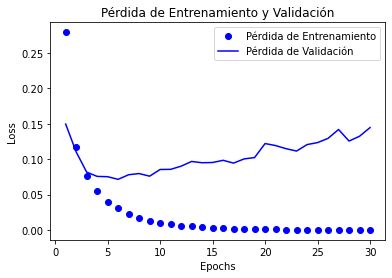

In [147]:
pinta_perdida_entrenamiento_validacion(historia0)

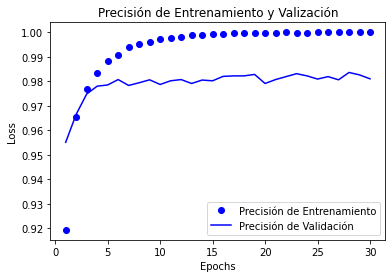

In [148]:
pinta_precision_entrenamiento_validacion(historia0)

### Caso 1: Con regularizador l1

In [149]:
network1 = crea_modelo(1)

Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_21 (Dense)            (None, 512)               401920    
                                                                 
 dense_22 (Dense)            (None, 10)                5130      
                                                                 
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________


In [150]:
network1 = compila_modelo(network1)

In [151]:
historia1 = entrena_modelo(network1)

Epoch 1/30
391/391 [==============================] - 6s 15ms/step - loss: 2.1449 - accuracy: 0.8451 - val_loss: 1.0543 - val_accuracy: 0.8656
Epoch 2/30
391/391 [==============================] - 5s 14ms/step - loss: 0.9637 - accuracy: 0.8796 - val_loss: 0.8346 - val_accuracy: 0.9121
Epoch 3/30
391/391 [==============================] - 5s 14ms/step - loss: 0.8417 - accuracy: 0.9007 - val_loss: 0.7752 - val_accuracy: 0.9142
Epoch 4/30
391/391 [==============================] - 5s 14ms/step - loss: 0.7653 - accuracy: 0.9141 - val_loss: 0.7247 - val_accuracy: 0.9267
Epoch 5/30
391/391 [==============================] - 5s 14ms/step - loss: 0.7125 - accuracy: 0.9235 - val_loss: 0.6671 - val_accuracy: 0.9364
Epoch 6/30
391/391 [==============================] - 5s 13ms/step - loss: 0.6722 - accuracy: 0.9316 - val_loss: 0.6792 - val_accuracy: 0.9299
Epoch 7/30
391/391 [==============================] - 5s 13ms/step - loss: 0.6442 - accuracy: 0.9362 - val_loss: 0.6518 - val_accuracy: 0.9376

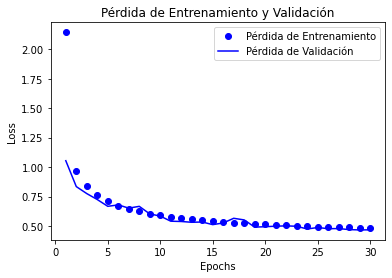

In [152]:
pinta_perdida_entrenamiento_validacion(historia1)

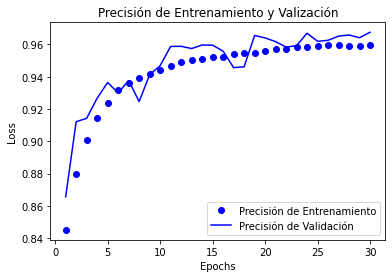

In [153]:
pinta_precision_entrenamiento_validacion(historia1)

### Caso 2: Con regularizador l2

In [154]:
network2 = crea_modelo(2)

Model: "sequential_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_23 (Dense)            (None, 512)               401920    
                                                                 
 dense_24 (Dense)            (None, 10)                5130      
                                                                 
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________


In [155]:
network2 = compila_modelo(network2)

In [156]:
historia2 = entrena_modelo(network2)

Epoch 1/30
391/391 [==============================] - 6s 13ms/step - loss: 0.5308 - accuracy: 0.9122 - val_loss: 0.3075 - val_accuracy: 0.9503
Epoch 2/30
391/391 [==============================] - 5s 13ms/step - loss: 0.2658 - accuracy: 0.9541 - val_loss: 0.2186 - val_accuracy: 0.9676
Epoch 3/30
391/391 [==============================] - 5s 13ms/step - loss: 0.2104 - accuracy: 0.9630 - val_loss: 0.2005 - val_accuracy: 0.9638
Epoch 4/30
391/391 [==============================] - 5s 14ms/step - loss: 0.1872 - accuracy: 0.9674 - val_loss: 0.1898 - val_accuracy: 0.9653
Epoch 5/30
391/391 [==============================] - 5s 13ms/step - loss: 0.1737 - accuracy: 0.9694 - val_loss: 0.1657 - val_accuracy: 0.9711
Epoch 6/30
391/391 [==============================] - 5s 13ms/step - loss: 0.1643 - accuracy: 0.9717 - val_loss: 0.1799 - val_accuracy: 0.9658
Epoch 7/30
391/391 [==============================] - 5s 13ms/step - loss: 0.1560 - accuracy: 0.9737 - val_loss: 0.2174 - val_accuracy: 0.9535

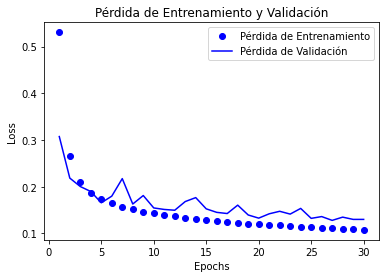

In [157]:
pinta_perdida_entrenamiento_validacion(historia2)

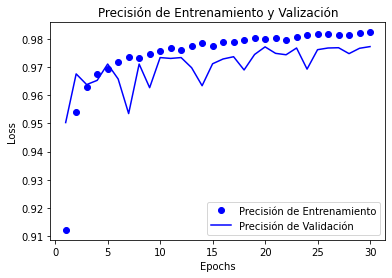

In [158]:
pinta_precision_entrenamiento_validacion(historia2)

### Caso 3: Con regularizador l1_l2

In [159]:
network3 = crea_modelo(3)

Model: "sequential_14"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_25 (Dense)            (None, 512)               401920    
                                                                 
 dense_26 (Dense)            (None, 10)                5130      
                                                                 
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________


In [160]:
network3 = compila_modelo(network3)

In [161]:
historia3 = entrena_modelo(network3)

Epoch 1/30
391/391 [==============================] - 7s 16ms/step - loss: 2.1759 - accuracy: 0.8425 - val_loss: 1.0758 - val_accuracy: 0.8612
Epoch 2/30
391/391 [==============================] - 6s 15ms/step - loss: 0.9758 - accuracy: 0.8794 - val_loss: 0.8744 - val_accuracy: 0.9078
Epoch 3/30
391/391 [==============================] - 6s 15ms/step - loss: 0.8524 - accuracy: 0.9000 - val_loss: 0.7953 - val_accuracy: 0.9160
Epoch 4/30
391/391 [==============================] - 6s 15ms/step - loss: 0.7768 - accuracy: 0.9139 - val_loss: 0.8054 - val_accuracy: 0.9039
Epoch 5/30
391/391 [==============================] - 6s 15ms/step - loss: 0.7293 - accuracy: 0.9213 - val_loss: 0.6891 - val_accuracy: 0.9366
Epoch 6/30
391/391 [==============================] - 6s 14ms/step - loss: 0.6928 - accuracy: 0.9278 - val_loss: 0.6903 - val_accuracy: 0.9247
Epoch 7/30
391/391 [==============================] - 6s 15ms/step - loss: 0.6653 - accuracy: 0.9325 - val_loss: 0.6251 - val_accuracy: 0.9433

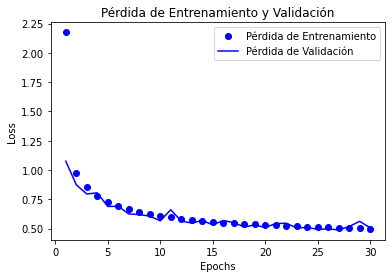

In [162]:
pinta_perdida_entrenamiento_validacion(historia3)

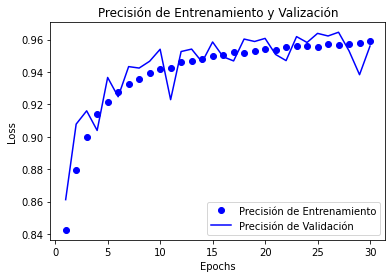

In [163]:
pinta_precision_entrenamiento_validacion(historia3)

### Caso 4: Con Droput

In [164]:
network4 = crea_modelo(4)

Model: "sequential_15"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_27 (Dense)            (None, 512)               401920    
                                                                 
 dropout (Dropout)           (None, 512)               0         
                                                                 
 dense_28 (Dense)            (None, 10)                5130      
                                                                 
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________


In [165]:
network4 = compila_modelo(network4)

In [166]:
historia4 = entrena_modelo(network4)

Epoch 1/30
391/391 [==============================] - 5s 13ms/step - loss: 0.3494 - accuracy: 0.8968 - val_loss: 0.1546 - val_accuracy: 0.9576
Epoch 2/30
391/391 [==============================] - 5s 12ms/step - loss: 0.1715 - accuracy: 0.9497 - val_loss: 0.1124 - val_accuracy: 0.9664
Epoch 3/30
391/391 [==============================] - 5s 13ms/step - loss: 0.1299 - accuracy: 0.9607 - val_loss: 0.1068 - val_accuracy: 0.9695
Epoch 4/30
391/391 [==============================] - 5s 13ms/step - loss: 0.1098 - accuracy: 0.9672 - val_loss: 0.0912 - val_accuracy: 0.9741
Epoch 5/30
391/391 [==============================] - 5s 13ms/step - loss: 0.0954 - accuracy: 0.9711 - val_loss: 0.0842 - val_accuracy: 0.9755
Epoch 6/30
391/391 [==============================] - 5s 13ms/step - loss: 0.0830 - accuracy: 0.9756 - val_loss: 0.0826 - val_accuracy: 0.9772
Epoch 7/30
391/391 [==============================] - 5s 13ms/step - loss: 0.0746 - accuracy: 0.9771 - val_loss: 0.0799 - val_accuracy: 0.9778

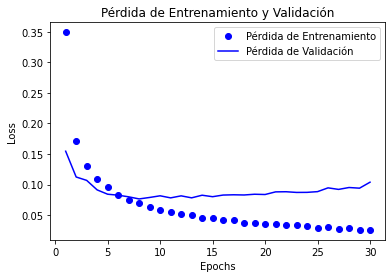

In [167]:
pinta_perdida_entrenamiento_validacion(historia4)

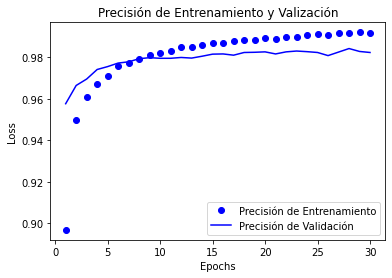

In [168]:
pinta_precision_entrenamiento_validacion(historia4)

### Caso 5: Error de código de regularizador

In [169]:
network5 = crea_modelo(5)

ValueError: ignored

### CONCLUSIONES

Tras observar los casos: regularizador_l1, regularizador l2 y regularizador l1_l2. Llegamos a la conclusión que el mejor regularizador es el l1_l2, ya que como podemos observar en la gráfica de pérdida de entrenamiento y precisión, nuestros datos coinciden mejor que en ningún otra gráfica. 
Aún así, comentamos cada uno de los casos. Empezamos por regularización l1:


Tras observar los datos y posteriormente la gráfica, llegamos a la conclusión que el caso 1 comienza con un sobreentrenamiento inmediato, por lo que queda totalmente descartado. 


Siguiendo con el regulatizador l2:

El comienzo de este caso no es como el anterior por lo que nos puede llevar a pensar que es el idóneo. Sin embargo, si observamos con detenimiento la gráfica vemos que a partir de la época 5 experimenta un sobreentrenamiento elevado. 


Sin embargo, el regularizador l1_l2 es el que menor sobreentrenamiento tiene y mantiene los datos de pérdida de entrenamiento.


Por último, el dropout es el peor de todos si nos fijamos en la gráfica ya que es notable el sobreentrenamiento que experimenta. 
